In [401]:
# Author : Rakesh Rane Sardesai, Email: rakeshsardesai@gmail.com

# Yourcabs

### **Problem statement:** The business problem here is trying to improve customer service for "Yourcabs.com", a cab company in Banglore.
### The problem of interest is booking cancellations by the company due to non availability of car. The challenge is that cancellations can occur very close to the trip start time, thereby causing passengers inconvenience

### **Solution:** The goal of competition is to create a predictive model for classifying new bookings as to whether they will eventually get cancelled due to car unvailability.

### **Backgroud of project**

In [402]:
# This is a cab booking company, started in 2013. There is no live location or mobile app. It is not like Uber or Ola. 
# This is like Meru cab or Radio taxi. Booking can be done through website, mobile website or phone call.
# Workflow : Customer will fill the details in form and submit form. Once submitted the details will go to employee of yourcab. 
# They will do manual check and update the cab booking details and finally send sms/email for confirmation of booking.
# There are 2 possibilities 1] Cab will arive 2] Cab will get cancelled.
# If cab gets cancelled due to any reasons, company has to pay penalty to the customer ( Customer is not cancelling the cab). 
# There is cost to the company and also spoiing brand name. To reduce the cost, company wants a ML model that can tell them during the creation of
# booking whether this car cab booking will get cancelled or not? i.e on submit of form by customer, the details should be send to ML model 
# instead of sending to employee. if the ML model says not cancelled then it should go to employee for further processing else it will tell the user
# cannot take your booking, please try after sometime

In [403]:
import pandas as pd
import numpy as np
from dateutil import parser

# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [404]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [405]:
import seaborn as sns
import matplotlib.pyplot as plt

In [406]:
df_original= pd.read_csv("YourCabs.csv")

In [407]:
df_original.head(3)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0


In [408]:
df_original.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [409]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [410]:
df_original.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [411]:
# Understand the data dictionary for meaning of each columns
# id - Booking ID and is unique
# 'user_id'- ID /Mobile of customer. PII data
# 'vehicle_model_id'- Vehicle model type
# 'package_id'- Type of package ( 1 = 4hr & 40 km, 2= 8hr & 80 km, 3= , 4= , 5=, 6= , 7= )- Selected ony for 3 = hourly rental
# 'travel_type_id'- Type of travel ( 1= long distance (Intercity), 2 = point to point ( Intra city), 3 = hourly rental)
#                   Only if customer chooses hourly rental then only he wilbe allowed to choose package ID
# 'from_area_id'- Its like a pincode. Unique identified of area. Applicable for point to point travel(3) and package. Mandotory for all travel types
# 'to_area_id'-Its like a pincode. Unique identified of area. Applicable for point to point travel Its mandatory for only point-to-point travel
# 'from_city_id'- Unique identified of city 
# 'to_city_id'- Unique identified of city ( ony for intercity/long distance travel)
# 'from_date'- Timestamp of requested trip start
# 'online_booking' - If booking was done on deskstop ( value 0 or 1)
# 'mobile_site_booking'- If booking was done on deskstop ( value 0 or 1)
# 'booking_created'- Timestamp of booking
# 'from_lat','from_long', 'to_lat', 'to_long' - Latitude of from/to area. Not live location. Its predifined in system
# 'Car_Cancellation'-Target. Whether the booking was cancelled (1) or not(0)

### I- Analyze each of the feature of data dictionary

In [412]:
# what features you want a]to keep b] drop c] keep but transform  2) Why  3) What is the transformation you want to apply on feature

# 'id' - Drop the ID column as every value is unique here.
# 'user_id' - Drop as it is PII
# 'vehicle_model_id', 
# 'package_id', 
# 'travel_type_id',   
# 'from_area_id', 
# 'to_area_id', 
# 'from_city_id', 
# 'to_city_id', 
# 'from_date',   
# 'online_booking', 
# 'mobile_site_booking', 
# 'booking_created', 
# 'from_lat',
# 'from_long', 
# 'to_lat', 
# 'to_long', 
# 'Car_Cancellation'

###### **Analyze feature "ID"**

In [413]:
df_original['id'].nunique() # Total rows of data are 43431 and ID has all unique values. So drop the column

43431

###### **Analyze feature "vehicle_model_id"**

In [414]:
df_original['vehicle_model_id'].value_counts()

vehicle_model_id
12    31859
85     2407
89     2391
65     1912
28     1702
24     1494
87      565
90      312
23      297
86      123
10      104
64       85
54       73
17       40
91       25
30       14
36        9
13        7
72        2
1         2
43        2
14        1
69        1
76        1
75        1
70        1
39        1
Name: count, dtype: int64

In [415]:
# It can be observed that the vehical_model_id =12 as 73 % data of the total data which can lead to baised model. 
# Statistically its not fit so drop the feature. 73% is representing single value 12 and if one try to predict using this data it willgive you type=12 vehicle
round((df_original['vehicle_model_id'].value_counts()) *100 / df_original.shape[0],2)

# THIS DATA WAS NOT DROPPED AS GOING AHEAD KEEPING IT

vehicle_model_id
12    73.36
85     5.54
89     5.51
65     4.40
28     3.92
24     3.44
87     1.30
90     0.72
23     0.68
86     0.28
10     0.24
64     0.20
54     0.17
17     0.09
91     0.06
30     0.03
36     0.02
13     0.02
72     0.00
1      0.00
43     0.00
14     0.00
69     0.00
76     0.00
75     0.00
70     0.00
39     0.00
Name: count, dtype: float64

In [416]:
#Check nul data in vehicle model id
df_original['vehicle_model_id'].isnull().sum()

0

###### **Analyze feature "package_id"**

In [417]:
# Package ID , 82 % of value is null but this null is not actual missing value. 
# Its null as this package id will be only available for travel type 3 (hourly rental)
#This column can be dropped for the data Travel Type=1

In [418]:
df_original['package_id'].isnull().sum()

35881

In [419]:
round( df_original['package_id'].isnull().sum() * 100/ df_original.shape[0],2)

82.62

###### **Analyze feature "travel_type_id"**

###### **Conclusion for feature travel_type_id**

In [420]:
# The behavour of data is dependent on travel type ID 1, 2,3. so we will split our data into 3 parts for further analysis
    # Part 1- travel_type_id=1 and create Machine learning model 1
    # Part 2- travel_type_id=2 and create Machine learning model 2
    # Part 3- travel_type_id=3 and create Machine learning model 3
# Its better to capture the pattern of cancellation for each travel type separately which will give better model

# Total records for travel_type_id=1 are 1589
# Total records for travel_type_id=2 are 34292
# Total records for travel_type_id=3 are 1589
# Total records are 43431

### Analyze the Data when travel_type_id=1 (long distance- Intercity) & create Model 1

#### Create dataset where travel_type_id"]==1

In [421]:
df_travel_type_1=df_original[df_original["travel_type_id"]==1]
df_travel_type_1.head(3)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
17,132531,22189,24,NaN,1,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0
24,132539,22192,54,NaN,1,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0


#### Data Cleaning

In [422]:
df_travel_type_1['package_id' ].value_counts # To be dropped

<bound method IndexOpsMixin.value_counts of 6       NaN
17      NaN
24      NaN
158     NaN
216     NaN
         ..
43342   NaN
43385   NaN
43386   NaN
43393   NaN
43407   NaN
Name: package_id, Length: 1589, dtype: float64>

In [423]:
# it can be observed that the data is null for to_area_id,to_lat,to_long and this columns can be dropped
df_travel_type_1.loc[: , ["travel_type_id","to_area_id","to_lat","to_long"]]

,travel_type_id,to_area_id,to_lat,to_long
6,1,NaN,NaN,NaN
17,1,NaN,NaN,NaN
24,1,NaN,NaN,NaN
158,1,NaN,NaN,NaN
216,1,NaN,NaN,NaN
...,...,...,...,...
43342,1,NaN,NaN,NaN
43385,1,NaN,NaN,NaN
43386,1,NaN,NaN,NaN
43393,1,NaN,NaN,NaN


###### **Analyze feature "from_area_id"**

In [424]:
# from_area_id is a categorical column and has has 598 unique values ( Normally there should not be more than 7 categories in a feature). This column
# will not helpfull as it is and so need to transform it based on the cancellation % for each area
# Lets create category based on cancellation % for each frm area and denote it as Zero, Low, Medium or High as per the volume of cancellation. 
# Having this 4 catgorization will be better than having just original column from_area_id. 
# for example from_area_id=24 has zero cancellation, from_area_id=137 has 1 cancellation out of 8 i.e 12% cancellation which means low cancellation area 
# so we need to create buckets like 1 to 35 % canc- Low, 36-65 % med, 66-100 high
# Once its transformed to 4 catgories, can drop column from_area_id 

In [425]:
df_original['from_area_id'].nunique()

598

In [426]:
# Count of null records for from_area_id column in original dataset
df_original['from_area_id'].isnull().sum()

88

In [427]:
# % of null values for "from_area_id" in original dataset
(88*100)/1589

5.5380742605412205

In [428]:
# Count of null data for from_area_id column in traveltype=1 dataset
# All the null records are in travel type 1 ( long distance travel). We can assume that it should be bangaluru as starting point as the app is for Bangaluru
# from_city_id=15, from_area_1d has 88 null values
# for from_city_id=15 (Bangaluru) there are total 1281 values in from_area_id including null values
    # null are values are 87
    # Unique area id were 260
# for from_city_id=1 when checked the from_area_id, it was found that there were 49 common area id between from_city_id 1 & 15.
# assuming Rest area_id ( 260-49)=211 may belong to from_city_id=15.

# Total records for travel_type_id=1 are 1589 ( includes 87 null for from_area_id column)
# Total records for travel_type_id=2 are 34292
# Total records for travel_type_id=3 are 1589
# Total records are 43431

df_travel_type_1['from_area_id'].isnull().sum()

88

In [429]:
# Startegy to decide whether to drop null records for from_area_id column or use Mode Imputation,Predictive Imputation, Flag and Impute, 

In [430]:
# Currently going ahead with strategy of dropping records 88 records where from_area_id is null

In [431]:
df_travel_type_1[df_travel_type_1['from_area_id'].isnull()].describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,88.000000,88.000000,88.000000,0.0,88.0,0.0,0.0,88.000000,88.000000,88.000000,88.0,0.0,0.0,0.0,0.0,88.000000
mean,162166.193182,35250.693182,41.000000,NaN,1.0,NaN,NaN,15.181818,57.136364,0.738636,0.0,NaN,NaN,NaN,NaN,0.022727
std,13884.013259,10258.537680,30.266251,NaN,0.0,NaN,NaN,1.705606,38.865871,0.441896,0.0,NaN,NaN,NaN,NaN,0.149887
min,137342.000000,1944.000000,12.000000,NaN,1.0,NaN,NaN,15.000000,20.000000,0.000000,0.0,NaN,NaN,NaN,NaN,0.000000
25%,151270.250000,29425.250000,12.000000,NaN,1.0,NaN,NaN,15.000000,32.000000,0.000000,0.0,NaN,NaN,NaN,NaN,0.000000
50%,161405.500000,36724.500000,28.000000,NaN,1.0,NaN,NaN,15.000000,32.000000,1.000000,0.0,NaN,NaN,NaN,NaN,0.000000
75%,174013.750000,42923.000000,65.000000,NaN,1.0,NaN,NaN,15.000000,63.000000,1.000000,0.0,NaN,NaN,NaN,NaN,0.000000
max,185576.000000,48528.000000,90.000000,NaN,1.0,NaN,NaN,31.000000,162.000000,1.000000,0.0,NaN,NaN,NaN,NaN,1.000000


In [432]:
# Dropping records 88 records where from_area_id is null

In [433]:
df_travel_type_1= df_travel_type_1.dropna(subset=['from_area_id'])
df_travel_type_1.head(3)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
17,132531,22189,24,NaN,1,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0
24,132539,22192,54,NaN,1,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0


In [434]:
df_travel_type_1[df_travel_type_1['from_area_id'].isnull()].describe().head(3)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [435]:
# Function for creating cancellation buckets as below
# if cancellation_percentage is 0% then denote it has 'Z' (Zero)
# if cancellation_percentage is b/w 1-35% then denote it has 'L' (low)
# if cancellation_percentage is b/w 36-65%  then denote it has 'M'(Medium)
# if cancellation_percentage is b/w 66-100%  then denote it has 'H' (High)

def canc_per_buckets(canc_per):
    if canc_per <=0:
        return 'Z'
    elif canc_per >0 and canc_per <=35:
        return 'L'
    elif canc_per >35 and canc_per <=65:
        return 'M'
    else:
        return 'H'        

In [436]:
# Function to calculate the percentage cancellation of cab for each area
def area_canc_perc(group_area):
    total_rides= len(group_area)
    cancellations = group_area['Car_Cancellation'].sum()
    canc_per  = round((cancellations *100)/total_rides,2)
    canc_buc= canc_per_buckets(canc_per)
    return pd.Series({
        'area_canc_perc': canc_buc
    }) 

In [437]:
from_area_cancper= df_travel_type_1.groupby("from_area_id").apply(area_canc_perc).reset_index()

# Merge the cancellation percentage back to the original dataframe
df_travel_type_1 = pd.merge(df_travel_type_1, from_area_cancper, on='from_area_id', how='left')
df_travel_type_1.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc
0,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,L
1,132531,22189,24,NaN,1,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,Z


###### **Analyze feature "from_city_id"**

In [438]:
df_travel_type_1['from_city_id'].describe()

count    1305.000000
mean       13.924138
std         3.969351
min         1.000000
25%        15.000000
50%        15.000000
75%        15.000000
max        31.000000
Name: from_city_id, dtype: float64

In [439]:
# Check null count for column from_city_id
df_travel_type_1['from_city_id'].isnull().sum()

196

In [440]:
#As I can see the frequency of value for from_city_id 15 is more so filling the NaN with mode value
mode_v= df_travel_type_1['from_city_id'].mode()[0]
df_travel_type_1['from_city_id'].fillna(mode_v,inplace=True)

In [441]:
df_travel_type_1['from_city_id'].describe()

count    1501.000000
mean       14.064624
std         3.718667
min         1.000000
25%        15.000000
50%        15.000000
75%        15.000000
max        31.000000
Name: from_city_id, dtype: float64

In [442]:
df_travel_type_1['from_city_id'].value_counts()

from_city_id
15.0    1390
1.0      106
31.0       5
Name: count, dtype: int64

In [443]:
# post framsformation of from_city_id with mode there is no null data
df_travel_type_1['from_city_id'].isnull().sum()

0

In [444]:
# check for to_city_id
df_travel_type_1['to_city_id'].value_counts()

to_city_id
32.0     443
55.0     161
29.0     107
146.0     84
108.0     63
        ... 
88.0       1
169.0      1
25.0       1
139.0      1
50.0       1
Name: count, Length: 113, dtype: int64

In [445]:
df_travel_type_1['to_city_id'].describe()

count    1500.000000
mean       69.206667
std        50.382565
min         4.000000
25%        32.000000
50%        49.000000
75%       108.000000
max       203.000000
Name: to_city_id, dtype: float64

In [446]:
df_travel_type_1['to_city_id'].isnull().sum()

1

In [447]:
df_travel_type_1.iloc[1039]

id                               170802
user_id                           15889
vehicle_model_id                     12
package_id                          NaN
travel_type_id                        1
from_area_id                      330.0
to_area_id                       1080.0
from_city_id                       15.0
to_city_id                          NaN
from_date              09-02-2013 18:30
online_booking                        0
mobile_site_booking                   0
booking_created        09-01-2013 14:33
from_lat                      12.858833
from_long                     77.589127
to_lat                        12.957324
to_long                         77.6446
Car_Cancellation                      0
area_canc_perc                        Z
Name: 1039, dtype: object

In [448]:
# find the location of NaN values in the to_city_id
nan_index= df_travel_type_1['to_city_id'].index[df_travel_type_1['to_city_id'].isna()]
nan_index

Index([1039], dtype='int64')

In [449]:
df_travel_type_1['to_city_id'].isnull().sum()

1

In [450]:
# drop the row with NaN value in the city_id col
df_travel_type_1.drop(index=nan_index, inplace=True)
df_travel_type_1.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc
0,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,L
1,132531,22189,24,NaN,1,1383.0,NaN,15.0,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,Z
2,132539,22192,54,NaN,1,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0,Z
3,132697,22275,28,NaN,1,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0,Z
4,132760,22310,87,NaN,1,1118.0,NaN,15.0,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0,Z


In [451]:
df_travel_type_1['to_city_id'].unique()

array([108.,  32., 152.,  29., 160.,  64.,  61., 146.,  13., 179., 131.,
        55.,  31.,  24., 189., 147., 187.,  65., 178.,  49., 185., 161.,
       126.,  56.,  41.,  68.,  58.,  36., 135., 144., 163., 151.,  25.,
       191.,   4., 114., 203.,  44., 157.,  37., 115.,  51., 190.,  77.,
       109.,  45.,  16., 116.,  10., 154., 198.,  66., 167., 110., 113.,
       119., 170., 184.,  17.,  60.,  42.,  82.,  69.,   8.,  97.,  89.,
        62.,  67.,  76., 148., 137.,  85., 192., 125., 168., 132., 172.,
       164., 149.,  75.,  11., 121.,  57., 162.,  28.,  12.,  80., 134.,
        14., 176.,  88., 169.,  48., 139.,  30., 133.,  94., 200., 142.,
       165.,   5., 173., 186., 182., 196.,  18., 120., 197., 166., 111.,
        52.,  23.,  50.])

In [452]:
# from_city_id is mostly Bengaluru city (id=15) as this application is for Bengaluru  so for inter city travel starting point i.e. from_city_id 
# would be Bengaluru. We can create a route column for from_city_id & to_city_id( Group 2 columns & create new column Route 
# and calculate cancellation percentage to understand the frequency of cancellation for route.

# NOT DROPPING from_city_id, to_city_id

In [453]:
#Create route column by merging to columns(from_city_id+to_city_id)

In [454]:
# Check the data type for from_city_id+to_city_id
df_travel_type_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1500
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1500 non-null   int64  
 1   user_id              1500 non-null   int64  
 2   vehicle_model_id     1500 non-null   int64  
 3   package_id           0 non-null      float64
 4   travel_type_id       1500 non-null   int64  
 5   from_area_id         1500 non-null   float64
 6   to_area_id           0 non-null      float64
 7   from_city_id         1500 non-null   float64
 8   to_city_id           1500 non-null   float64
 9   from_date            1500 non-null   object 
 10  online_booking       1500 non-null   int64  
 11  mobile_site_booking  1500 non-null   int64  
 12  booking_created      1500 non-null   object 
 13  from_lat             1495 non-null   float64
 14  from_long            1495 non-null   float64
 15  to_lat               0 non-null      float6

In [455]:
#convert from_city_id & to_city_id to int before merging
df_travel_type_1['from_city_id'] = df_travel_type_1['from_city_id'].astype('int')
df_travel_type_1['to_city_id'] = df_travel_type_1['to_city_id'].astype('int')

In [456]:
df_travel_type_1['to_city_id'].info()

<class 'pandas.core.series.Series'>
Index: 1500 entries, 0 to 1500
Series name: to_city_id
Non-Null Count  Dtype
--------------  -----
1500 non-null   int32
dtypes: int32(1)
memory usage: 17.6 KB


In [457]:
df_travel_type_1.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc
0,132519,22172,12,NaN,1,571.0,NaN,15,108,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,L
1,132531,22189,24,NaN,1,1383.0,NaN,15,32,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,Z


In [458]:
#df_traveltype_1_canc_perc['route']=df_traveltype_1_canc_perc['from_city_id'].astype(str)+":"+df_traveltype_1_canc_perc['to_city_id'].astype(str)
df_travel_type_1['route']=df_travel_type_1['from_city_id'].astype(str)+df_travel_type_1['to_city_id'].astype(str)

label_encoder = LabelEncoder()
df_travel_type_1['route'] = label_encoder.fit_transform(df_travel_type_1['route'])
df_travel_type_1.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc,route
0,132519,22172,12,NaN,1,571.0,NaN,15,108,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,L,30
1,132531,22189,24,NaN,1,1383.0,NaN,15,32,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,Z,100


In [459]:
df_travel_type_1['route'].value_counts().sort_values(ascending=False)

route
100    413
114    152
97     100
55      78
30      61
      ... 
68       1
111      1
113      1
93       1
4        1
Name: count, Length: 146, dtype: int64

In [460]:
# Create route canc percentage a give weigt Zero, Low, Medium, High based on cacl volume for that route and drop from_city_id, To_city_id

In [461]:
df_travel_type_1.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc,route
0,132519,22172,12,NaN,1,571.0,NaN,15,108,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,L,30
1,132531,22189,24,NaN,1,1383.0,NaN,15,32,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,Z,100


In [462]:
# Function to calculate the percentage cancellation of cab for each area
def route_canc_perc(group_area1):
    total_rides_2= len(group_area1)
    cancellations_2 = group_area1['Car_Cancellation'].sum()
    canc_per_2  = round((cancellations_2 *100)/total_rides_2,2)
    canc_buc_2= canc_per_buckets(canc_per_2)
    return pd.Series({
        'route_canc_perc': canc_buc_2
    }) 

In [463]:
from_route_cancper= df_travel_type_1.groupby("route").apply(route_canc_perc).reset_index()

In [464]:
# Merge the cancellation percentage back to the original dataframe
df_travel_type_1 = pd.merge(df_travel_type_1, from_route_cancper, on='route', how='left')
df_travel_type_1.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc,route,route_canc_perc
0,132519,22172,12,NaN,1,571.0,NaN,15,108,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,L,30,L
1,132531,22189,24,NaN,1,1383.0,NaN,15,32,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,Z,100,L


###### **Analyze feature "online_booking, mobile_site_booking, Car_Cancellation"**

In [465]:
# Keep column online_booking, mobile_site_booking, Car_Cancellation column as it is.

###### **Analyze feature "from_date"**

In [466]:
# from_date : Extract every thing from from_date i.e 
    # get the month, day, 
    # understand whether it is afternoon booking, morning bookeing, late night booking. 
    # No need to extract year as it would be samee. 
    # Extract info for day of week i.e mon, tue, wed etc
    # extract if it was week day, week end
    # In from_date there is a pattern that there is a slot every 15 mins

In [467]:
# dateutil library is used to parse date strings with varying formats and then extract the desired date components:
# It was observed that the from_date has date values in different format so using dateutil method to conver date to uniform format '2013-01-19 07:00',  # YYYY-MM-DD HH:MM
#!pip install python-dateutil

In [468]:
# Check date format in old data, its not consistent
df_travel_type_1.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc,route,route_canc_perc
0,132519,22172,12,NaN,1,571.0,NaN,15,108,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,L,30,L
1,132531,22189,24,NaN,1,1383.0,NaN,15,32,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,Z,100,L
2,132539,22192,54,NaN,1,515.0,NaN,15,32,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0,Z,100,L
3,132697,22275,28,NaN,1,136.0,NaN,1,152,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0,Z,11,Z
4,132760,22310,87,NaN,1,1118.0,NaN,15,32,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0,Z,100,L


In [469]:
# Convert he date into uniform format
df_travel_type_1['from_date']=df_travel_type_1['from_date'].apply(parser.parse)
df_travel_type_1.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc,route,route_canc_perc
0,132519,22172,12,NaN,1,571.0,NaN,15,108,2013-01-01 09:45:00,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,L,30,L
1,132531,22189,24,NaN,1,1383.0,NaN,15,32,2013-01-12 08:00:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,Z,100,L


In [470]:
# Extract month, day, and hour
df_travel_type_1['frm_dt_month'] = df_travel_type_1['from_date'].dt.month
df_travel_type_1['frm_dt_day'] = df_travel_type_1['from_date'].dt.day # To decide later if to drop
df_travel_type_1['frm_dt_hour'] = df_travel_type_1['from_date'].dt.hour

In [471]:
df_travel_type_1.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc,route,route_canc_perc,frm_dt_month,frm_dt_day,frm_dt_hour
0,132519,22172,12,NaN,1,571.0,NaN,15,108,2013-01-01 09:45:00,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,L,30,L,1,1,9
1,132531,22189,24,NaN,1,1383.0,NaN,15,32,2013-01-12 08:00:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,Z,100,L,1,12,8


In [472]:
# Extract day of the week (0=Monday, 6=Sunday)
df_travel_type_1['frm_dt_day_of_week'] = df_travel_type_1['from_date'].dt.dayofweek
df_travel_type_1.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc,route,route_canc_perc,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week
0,132519,22172,12,NaN,1,571.0,NaN,15,108,2013-01-01 09:45:00,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,L,30,L,1,1,9,1
1,132531,22189,24,NaN,1,1383.0,NaN,15,32,2013-01-12 08:00:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,Z,100,L,1,12,8,5


In [473]:
# Determine if it's a weekday or weekend
df_travel_type_1['frm_dt_wkday_wkend'] = df_travel_type_1['frm_dt_day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df_travel_type_1.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc,route,route_canc_perc,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,frm_dt_wkday_wkend
0,132519,22172,12,NaN,1,571.0,NaN,15,108,2013-01-01 09:45:00,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,L,30,L,1,1,9,1,Weekday
1,132531,22189,24,NaN,1,1383.0,NaN,15,32,2013-01-12 08:00:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,Z,100,L,1,12,8,5,Weekend


In [474]:
# Function to categorize time of day like morning, evening, late night
def categorize_time_of_day(time):
    if 5 <= time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 18:
        return 'Afternoon'
    elif 18 <= time.hour < 22:
        return 'Evening'
    else:
        return 'Late Night'

In [475]:
pd.set_option('display.max_columns',40)

In [476]:
# Apply the function to the DataFrame
df_travel_type_1['frm_dt_time_of_day'] = df_travel_type_1['from_date'].apply(lambda x: categorize_time_of_day(x))
df_travel_type_1.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc,route,route_canc_perc,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,frm_dt_wkday_wkend,frm_dt_time_of_day
0,132519,22172,12,NaN,1,571.0,NaN,15,108,2013-01-01 09:45:00,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0,L,30,L,1,1,9,1,Weekday,Morning
1,132531,22189,24,NaN,1,1383.0,NaN,15,32,2013-01-12 08:00:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0,Z,100,L,1,12,8,5,Weekend,Morning


###### **Analyze feature "booking_created "**

In [477]:
# booking_created : no need to extract any details as done for from_date. Only calculate the difference between time when the booking was done 
# and the actual start time of trip. This will help to understand how much in advance the booking was done from the actual start time

In [478]:
# convert the date in proper format
df_travel_type_1['booking_created']=df_travel_type_1['booking_created'].apply(parser.parse)
df_travel_type_1.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc,route,route_canc_perc,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,frm_dt_wkday_wkend,frm_dt_time_of_day
0,132519,22172,12,NaN,1,571.0,NaN,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,12.951850,77.696420,NaN,NaN,0,L,30,L,1,1,9,1,Weekday,Morning
1,132531,22189,24,NaN,1,1383.0,NaN,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,12.930451,77.685822,NaN,NaN,0,Z,100,L,1,12,8,5,Weekend,Morning


In [479]:
# calculate the difference between time when the booking was done and the actual start time of trip in new column "time_bw_bk_at"

In [480]:
# Calculate the time difference
#df['time_diff_bw_bk_at'] = df_traveltype_1_canc_perc['booking_created'] - df_traveltype_1_canc_perc['from_date']
df_travel_type_1['time_diff_bw_bk_at']=df_travel_type_1['from_date'] - df_travel_type_1['booking_created']

# Calculate the time difference in hours if requied
df_travel_type_1['time_diff_day_bk_at'] = round(df_travel_type_1['time_diff_bw_bk_at'] / pd.Timedelta(hours=1),2)
del df_travel_type_1['time_diff_bw_bk_at']
df_travel_type_1.head(2)


,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc,route,route_canc_perc,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,frm_dt_wkday_wkend,frm_dt_time_of_day,time_diff_day_bk_at
0,132519,22172,12,NaN,1,571.0,NaN,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,12.951850,77.696420,NaN,NaN,0,L,30,L,1,1,9,1,Weekday,Morning,0.40
1,132531,22189,24,NaN,1,1383.0,NaN,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,12.930451,77.685822,NaN,NaN,0,Z,100,L,1,12,8,5,Weekend,Morning,259.72


In [481]:
# Drop columns booking_created','from_date as transformation is completed

In [482]:
# Drop column to_area_id as it has all null.It is used ony for travel type=2 and not for 1
df_travel_type_1.isnull().sum()

id                        0
user_id                   0
vehicle_model_id          0
package_id             1500
travel_type_id            0
from_area_id              0
to_area_id             1500
from_city_id              0
to_city_id                0
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                  5
from_long                 5
to_lat                 1500
to_long                1500
Car_Cancellation          0
area_canc_perc            0
route                     0
route_canc_perc           0
frm_dt_month              0
frm_dt_day                0
frm_dt_hour               0
frm_dt_day_of_week        0
frm_dt_wkday_wkend        0
frm_dt_time_of_day        0
time_diff_day_bk_at       0
dtype: int64

In [483]:
# Drop column id, user_id, package_id,travel_type_id,from_area_id, from_lat, from_long, to_lat,to_long,booking_created','from_date
# Droping from_lat, from_long inspite of having data since to_lat,to_long had null data. There is no point just keeping from_lat, from_long alone

In [484]:
df_travel_type_1.describe().head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,route,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,time_diff_day_bk_at
count,1500.000000,1500.000000,1500.000000,0.0,1500.0,1500.000,0.0,1500.000,1500.000000,1500,1500.000000,1500.00,1500,1495.000000,1495.000000,0.0,0.0,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,159607.887333,32160.915333,41.816667,NaN,1.0,655.314,NaN,14.064,69.206667,2013-07-04 08:43:28.200000,0.409333,0.02,2013-07-01 23:43:19.199999744,12.998489,77.650722,NaN,NaN,0.012667,85.280667,6.602667,15.502667,8.111333,3.895333,57.00238


In [485]:
df_travel_type_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   1500 non-null   int64         
 1   user_id              1500 non-null   int64         
 2   vehicle_model_id     1500 non-null   int64         
 3   package_id           0 non-null      float64       
 4   travel_type_id       1500 non-null   int64         
 5   from_area_id         1500 non-null   float64       
 6   to_area_id           0 non-null      float64       
 7   from_city_id         1500 non-null   int32         
 8   to_city_id           1500 non-null   int32         
 9   from_date            1500 non-null   datetime64[ns]
 10  online_booking       1500 non-null   int64         
 11  mobile_site_booking  1500 non-null   int64         
 12  booking_created      1500 non-null   datetime64[ns]
 13  from_lat             1495 non-nul

###  Data Encoding

In [486]:
# area_canc_perc  : Label encoding for ordinal this categorical column with below rank z=0,L=1, M=2, H=3
# if cancellation_percentage is 0% then denote it has 'Z' (Zero)
# if cancellation_percentage is b/w 1-35% then denote it has 'L' (low)
# if cancellation_percentage is b/w 36-65%  then denote it has 'M'(Medium)
# if cancellation_percentage is b/w 66-100%  then denote it has 'H' (High)

In [487]:
df_travel_type_1['area_canc_perc'].value_counts()

area_canc_perc
Z    978
L    516
M      6
Name: count, dtype: int64

In [488]:
df_travel_type_1['area_canc_perc_encoded'] = df_travel_type_1['area_canc_perc'].map({'Z':0,'L':1,'M':2,'H':3})
del df_travel_type_1['area_canc_perc']
df_travel_type_1.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,route,route_canc_perc,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,frm_dt_wkday_wkend,frm_dt_time_of_day,time_diff_day_bk_at,area_canc_perc_encoded
0,132519,22172,12,NaN,1,571.0,NaN,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,12.951850,77.696420,NaN,NaN,0,30,L,1,1,9,1,Weekday,Morning,0.40,1
1,132531,22189,24,NaN,1,1383.0,NaN,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,12.930451,77.685822,NaN,NaN,0,100,L,1,12,8,5,Weekend,Morning,259.72,0


In [489]:
df_travel_type_1['route_canc_perc'].value_counts()

route_canc_perc
Z    769
L    731
Name: count, dtype: int64

In [490]:
df_travel_type_1['route_canc_perc_encoded'] = df_travel_type_1['route_canc_perc'].map({'Z':0,'L':1,'M':2,'H':3})
del df_travel_type_1['route_canc_perc']
df_travel_type_1.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,route,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,frm_dt_wkday_wkend,frm_dt_time_of_day,time_diff_day_bk_at,area_canc_perc_encoded,route_canc_perc_encoded
0,132519,22172,12,NaN,1,571.0,NaN,15,108,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,12.951850,77.696420,NaN,NaN,0,30,1,1,9,1,Weekday,Morning,0.40,1,1
1,132531,22189,24,NaN,1,1383.0,NaN,15,32,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,12.930451,77.685822,NaN,NaN,0,100,1,12,8,5,Weekend,Morning,259.72,0,1


In [491]:
# Encode column frm_dt_wkday_wkend
df_travel_type_1['frm_dt_wkday_wkend'].value_counts()

frm_dt_wkday_wkend
Weekend    763
Weekday    737
Name: count, dtype: int64

In [492]:
#### **Final dataset for travel type =1**

In [493]:
# Not droping vehicle_model_ID
#df_traveltype_1_with_canc_perc=df_traveltype_1_with_canc_perc.drop(columns=['id','user_id','package_id','travel_type_id','from_area_id','from_lat','from_long','to_lat','to_long','route'],axis=1)
df_travel_type_1=df_travel_type_1.drop(columns=['id','user_id','package_id','travel_type_id','from_area_id','to_area_id','route','from_lat','from_long','to_lat','to_long','booking_created','from_date'],axis=1)
df_travel_type_1.head(2)

,vehicle_model_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,frm_dt_wkday_wkend,frm_dt_time_of_day,time_diff_day_bk_at,area_canc_perc_encoded,route_canc_perc_encoded
0,12,15,108,0,0,0,1,1,9,1,Weekday,Morning,0.40,1,1
1,24,15,32,1,0,0,1,12,8,5,Weekend,Morning,259.72,0,1


In [494]:
le = preprocessing.LabelEncoder()

In [495]:
le.fit_transform(df_travel_type_1['frm_dt_wkday_wkend'])

array([0, 1, 1, ..., 1, 1, 0])

In [496]:
df_travel_type_1['frm_dt_wkday_wkend_encoded'] =le.fit_transform(df_travel_type_1['frm_dt_wkday_wkend'])
del df_travel_type_1['frm_dt_wkday_wkend']
df_travel_type_1.head(2)

,vehicle_model_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,frm_dt_time_of_day,time_diff_day_bk_at,area_canc_perc_encoded,route_canc_perc_encoded,frm_dt_wkday_wkend_encoded
0,12,15,108,0,0,0,1,1,9,1,Morning,0.40,1,1,0
1,24,15,32,1,0,0,1,12,8,5,Morning,259.72,0,1,1


In [497]:
# Encode frm_dt_time_of_day
df_travel_type_1['frm_dt_time_of_day_encoded'] =le.fit_transform(df_travel_type_1['frm_dt_time_of_day'])
del df_travel_type_1['frm_dt_time_of_day']
df_travel_type_1.head(2)

,vehicle_model_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,time_diff_day_bk_at,area_canc_perc_encoded,route_canc_perc_encoded,frm_dt_wkday_wkend_encoded,frm_dt_time_of_day_encoded
0,12,15,108,0,0,0,1,1,9,1,0.40,1,1,0,3
1,24,15,32,1,0,0,1,12,8,5,259.72,0,1,1,3


In [498]:
df_travel_type_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vehicle_model_id            1500 non-null   int64  
 1   from_city_id                1500 non-null   int32  
 2   to_city_id                  1500 non-null   int32  
 3   online_booking              1500 non-null   int64  
 4   mobile_site_booking         1500 non-null   int64  
 5   Car_Cancellation            1500 non-null   int64  
 6   frm_dt_month                1500 non-null   int32  
 7   frm_dt_day                  1500 non-null   int32  
 8   frm_dt_hour                 1500 non-null   int32  
 9   frm_dt_day_of_week          1500 non-null   int32  
 10  time_diff_day_bk_at         1500 non-null   float64
 11  area_canc_perc_encoded      1500 non-null   int64  
 12  route_canc_perc_encoded     1500 non-null   int64  
 13  frm_dt_wkday_wkend_encoded  1500 

In [499]:
#convert from_area_id to int as it is giving error in Decision Tree with c4.5(entropy) below
#df_traveltype_1_canc_perc['from_area_id'] = df_traveltype_1_canc_perc['from_area_id'].astype('int')
df_travel_type_1['time_diff_day_bk_at'] = df_travel_type_1['time_diff_day_bk_at'].astype('int')

In [500]:
df_travel_type_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   vehicle_model_id            1500 non-null   int64
 1   from_city_id                1500 non-null   int32
 2   to_city_id                  1500 non-null   int32
 3   online_booking              1500 non-null   int64
 4   mobile_site_booking         1500 non-null   int64
 5   Car_Cancellation            1500 non-null   int64
 6   frm_dt_month                1500 non-null   int32
 7   frm_dt_day                  1500 non-null   int32
 8   frm_dt_hour                 1500 non-null   int32
 9   frm_dt_day_of_week          1500 non-null   int32
 10  time_diff_day_bk_at         1500 non-null   int32
 11  area_canc_perc_encoded      1500 non-null   int64
 12  route_canc_perc_encoded     1500 non-null   int64
 13  frm_dt_wkday_wkend_encoded  1500 non-null   int32
 14  frm_dt_t

In [501]:
# Datset ready for model 1
df_travel_type_1.head()

,vehicle_model_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,time_diff_day_bk_at,area_canc_perc_encoded,route_canc_perc_encoded,frm_dt_wkday_wkend_encoded,frm_dt_time_of_day_encoded
0,12,15,108,0,0,0,1,1,9,1,0,1,1,0,3
1,24,15,32,1,0,0,1,12,8,5,259,0,1,1,3
2,54,15,32,0,0,0,1,5,8,5,89,0,1,1,3
3,28,1,152,1,0,0,1,4,9,4,21,0,0,0,3
4,87,15,32,1,0,0,1,6,7,6,45,0,1,1,3


In [502]:
df_travel_type_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   vehicle_model_id            1500 non-null   int64
 1   from_city_id                1500 non-null   int32
 2   to_city_id                  1500 non-null   int32
 3   online_booking              1500 non-null   int64
 4   mobile_site_booking         1500 non-null   int64
 5   Car_Cancellation            1500 non-null   int64
 6   frm_dt_month                1500 non-null   int32
 7   frm_dt_day                  1500 non-null   int32
 8   frm_dt_hour                 1500 non-null   int32
 9   frm_dt_day_of_week          1500 non-null   int32
 10  time_diff_day_bk_at         1500 non-null   int32
 11  area_canc_perc_encoded      1500 non-null   int64
 12  route_canc_perc_encoded     1500 non-null   int64
 13  frm_dt_wkday_wkend_encoded  1500 non-null   int32
 14  frm_dt_t

In [503]:
# find out the total missing values of a dataset

missing_value_count = df_travel_type_1.isnull().sum()
total_cells = np.product(df_travel_type_1.shape)
total_missing = missing_value_count.sum()

print(f"precentage of missing data for entire dataset is {(total_missing/total_cells)*100} %")

precentage of missing data for entire dataset is 0.0 %


19 1481


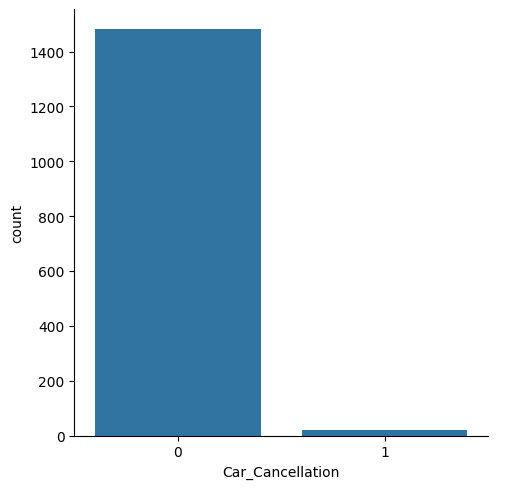

In [504]:
# 1. Imbalance data
# 2. how we can balance the imbalance data
pos = df_travel_type_1[df_travel_type_1["Car_Cancellation"]==1].shape[0]
neg = df_travel_type_1[df_travel_type_1["Car_Cancellation"]==0].shape[0]
print(pos, neg)
sns.catplot(data=df_travel_type_1, x="Car_Cancellation", kind="count")

### Extract Features and Target

In [505]:
x = df_travel_type_1.iloc[:,df_travel_type_1.columns !='Car_Cancellation']
x.head()

,vehicle_model_id,from_city_id,to_city_id,online_booking,mobile_site_booking,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,time_diff_day_bk_at,area_canc_perc_encoded,route_canc_perc_encoded,frm_dt_wkday_wkend_encoded,frm_dt_time_of_day_encoded
0,12,15,108,0,0,1,1,9,1,0,1,1,0,3
1,24,15,32,1,0,1,12,8,5,259,0,1,1,3
2,54,15,32,0,0,1,5,8,5,89,0,1,1,3
3,28,1,152,1,0,1,4,9,4,21,0,0,0,3
4,87,15,32,1,0,1,6,7,6,45,0,1,1,3


In [506]:
y = df_travel_type_1.Car_Cancellation
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Car_Cancellation, dtype: int64

In [507]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [508]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from statistics import mean

In [509]:
# pipeline with Robust scaler
pipeline_1 = Pipeline(steps=[("Robust", RobustScaler())])

In [510]:
X_1 = pipeline_1.fit_transform(x)

In [511]:
X_1

array([[-0.22641509,  0.        ,  0.77631579, ...,  1.        ,
        -1.        ,  0.        ],
       [ 0.        ,  0.        , -0.22368421, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.56603774,  0.        , -0.22368421, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.22641509,  0.        , -0.22368421, ...,  1.        ,
         0.        ,  0.        ],
       [-0.22641509,  0.        ,  0.88157895, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18867925,  0.        ,  0.17105263, ...,  0.        ,
        -1.        , -3.        ]])

In [512]:
#!pip install --upgrade imbalanced-learn

In [513]:
# balance the data
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_1, y)

In [514]:
X_res

array([[-0.22641509,  0.        ,  0.77631579, ...,  1.        ,
        -1.        ,  0.        ],
       [ 0.        ,  0.        , -0.22368421, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.56603774,  0.        , -0.22368421, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.17699998,  0.        ,  0.72690067, ...,  1.        ,
        -1.        ,  0.        ],
       [ 0.77358491,  0.        , -0.12181119, ...,  1.        ,
        -0.40749208, -0.81498417],
       [ 1.16122977,  0.        ,  1.81942067, ...,  1.        ,
        -1.        ,  0.        ]])

In [515]:
#!pip uninstall xgboost

In [516]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random forest" : RandomForestClassifier(),
    "Decision tree" : DecisionTreeClassifier(),
    "logisitic Regression" : LogisticRegression(),
    "knn classifier" : KNeighborsClassifier(),
    "xgb" : XGBClassifier()
}

In [517]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
                            confusion_matrix


def evaluate_clf(true, predicted):
    
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)    
    pre = precision_score(true, predicted)    
    recall = recall_score(true, predicted)    
    roc = roc_auc_score(true, predicted)  
    
    return acc, f1, pre, recall, roc


def total_cost(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    
    return cost

In [518]:
from sklearn.model_selection import train_test_split

def evaluate_model(X, y, models):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
    cost_list = []
    model_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # training the model
        
        # make prediction
        y_test_pred = model.predict(X_test)
        
        acc, f1, pre, recall, roc = evaluate_clf(y_test, y_test_pred)
        
        # calculate the cost
        test_cost = total_cost(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])
        
        print("Model performance for test Set")
        print(f"- Accuracy: {acc}")
        print(f"- f1 score: {f1}")        
        print(f"- precision score: {pre}")        
        print(f"- Recall: {recall}")        
        print(f"- roc: {roc}")
        print(f"- total cost : {test_cost}")
        
        cost_list.append(test_cost)
        
        print("="*35)
        print("\n")
        
    report = pd.DataFrame(list(zip(model_list, cost_list)), 
                               columns=["Model Name", 'Cost']).sort_values(by=["Cost"])
                          
    return report

In [519]:
report_1 = evaluate_model(X_res, y_res, models)

Random forest
Model performance for test Set
- Accuracy: 1.0
- f1 score: 1.0
- precision score: 1.0
- Recall: 1.0
- roc: 1.0
- total cost : 0


Decision tree
Model performance for test Set
- Accuracy: 0.972972972972973
- f1 score: 0.9706959706959707
- precision score: 0.9636363636363636
- Recall: 0.977859778597786
- roc: 0.9733535653113539
- total cost : 3100


logisitic Regression
Model performance for test Set
- Accuracy: 0.9493243243243243
- f1 score: 0.9469964664310954
- precision score: 0.9084745762711864
- Recall: 0.988929889298893
- roc: 0.9524088698830913
- total cost : 1770


knn classifier
Model performance for test Set
- Accuracy: 0.9493243243243243
- f1 score: 0.9475524475524476
- precision score: 0.9003322259136213
- Recall: 1.0
- roc: 0.9532710280373832
- total cost : 300


xgb
Model performance for test Set
- Accuracy: 0.9966216216216216
- f1 score: 0.9963235294117647
- precision score: 0.9926739926739927
- Recall: 1.0
- roc: 0.9968847352024922
- total cost : 20




In [520]:
report_1

,Model Name,Cost
0,Random forest,0
4,xgb,20
3,knn classifier,300
2,logisitic Regression,1770
1,Decision tree,3100


### Build Decision Tree Model

#### Decision Tree with Cart(Gini)¶

##### Decision Tree with depth 2

In [521]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [522]:
 X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)

In [523]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(X_train,y_train)

model_dt_2_score_train = model_dt_2.score(X_train,y_train)

model_dt_2_score_test = model_dt_2.score(X_test,y_test)

print('Training Score',model_dt_2_score_train)

print('Testing Score',model_dt_2_score_test)

Training Score 0.9197635135135135
Testing Score 0.9087837837837838


##### Decision Tree with depth 4

In [524]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(X_train,y_train)

model_dt_4_score_train = model_dt_4.score(X_train,y_train)

model_dt_4_score_test = model_dt_4.score(X_test,y_test)

print('Training Score',model_dt_4_score_train)

print('Testing Score',model_dt_4_score_test)

Training Score 0.9679054054054054
Testing Score 0.9594594594594594


##### Decision Tree with depth 6

In [525]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(X_train,y_train)

model_dt_6_score_train = model_dt_6.score(X_train,y_train)

model_dt_6_score_test = model_dt_6.score(X_test,y_test)

print('Training Score',model_dt_6_score_train)

print('Testing Score',model_dt_6_score_test)

Training Score 0.9776182432432432
Testing Score 0.9594594594594594


### Decision Tree with c4.5(entropy)¶

In [526]:
model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')

model_dt.fit(X_train,y_train)

model_dt_score_train = model_dt.score(X_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(X_test,y_test)
print(model_dt_score_test)

0.9197635135135135
0.9087837837837838


##### Area Under the Curve

In [527]:
from sklearn.metrics import roc_curve, auc
y_pred_dt = model_dt.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,_ = roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

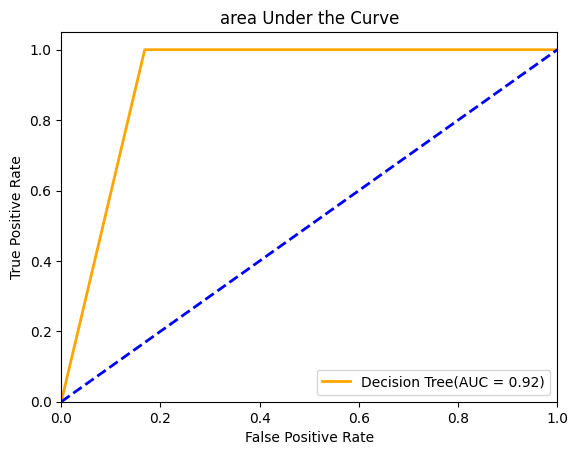

In [528]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")
plt.show()

### Conclusion on anaysis of for model 1 ( Travel_type_id'=1 Long distance- Intercity)

In [529]:
# Following features considered for model 1
# Vehicle_id, from_city_id, to_city_id, online_booking, mobile_site_booking, frm_dt_month, frm_dt_day,frm_dt_hour, frm_dt_day_of_week,
# time_diff_day_bk_at, area_canc_perc_encoded, route_canc_perc_encoded, frm_dt_wkday_wkend_encoded,frm_dt_time_of_day_encoded

# Model Name					Cost 	Accuracy	F1-score	Precision	Recall	ROC 
# 4	xgb						20		0.99		0.99		0.99		1.0		0.90
# 3	knn classifier			300		0.94		0.96		0.90		1.0		0.95
# 0	Random forest			500		0.998		0.998		1.0			0.99	0.99
# 2	logisitic Regression	1770	0.95		0.94		0.90		098		0.95
# 1	Decision tree			3600	0.97		0.97		0.96		0.97	0.97

# Decision Tree with Cart(Gini) : depth 	Training Score  Testing Score 
# 								depth=2 0.92 			0.91
# 								depth=4 0.97 			0.96								
# 								depth=6 0.97 			0.96
								
# Decision Tree with c4.5(entropy) 		0.92			0.91
# Decision Tree AUC 	0.92

# Note: The cost is lowest for Xgboost model so this model can be considered

### Dataset creation when travel_type_id=2 [point to point ( Intra city)]

In [530]:
df_travel_type_2=df_original[df_original["travel_type_id"]==2]
df_travel_type_2.head(3)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0


## Analyze the data & required features for Travel Type=2 (intra city)- MODEL 2 creation

In [531]:
# Package_id is applicable for only travel_type=3 and 82% of data is null for travel_type=2 - Drop it
# to_area_id'-Unique identified of area. Applicable for point to point travel Its mandatory for only point-to-point travel
# drop ID,user_id, vehicle_model_id, package_id, travel_type_id
# from_area_id, to_area_id - transform it by creating 3 new columns
    # from_area_id_canc_bucket- Create cancellation % for from_area and define the behavour as zero, low, med, high
    # to_area_id_canc_bucket- Create cancellation % for to_area and define the behavour as zero, low, med, high
    # route_canc_bucket- Create cancellation % for route and define the behavour as zero, low, med, high
# Do from_date transformation as done above
# Do booking_created transformation as done above
# for col from_lat, from_long, to_lat, to_long transform it by calculating the distance of trip in km and than delete the org col. Use Geopy

#### Analyze col from_lat, from_long, to_lat, to_long and transformation

In [532]:
# pip install pandas geopy

In [533]:
# Apply the Distance Calculation
from geopy.distance import geodesic

# Function to calculate distance
def calculate_distance(row):
    start_coords = (row['from_lat'], row['from_long'])
    end_coords = (row['to_lat'], row['to_long'])
    return geodesic(start_coords, end_coords).kilometers

# Apply the function to each row
df_travel_type_2['Trip_dist_km'] = df_travel_type_2.apply(calculate_distance, axis=1)

In [534]:
# Display the DataFrame with the new 'distance_km' column
df_travel_type_2.head(3)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Trip_dist_km
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,3.980687
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,14.004432
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,12.648909


In [535]:
from_area_cancper_2= df_travel_type_2.groupby("from_area_id").apply(area_canc_perc).reset_index()

# Merge the cancellation percentage back to the original dataframe
df_travel_type_2 = pd.merge(df_travel_type_2, from_area_cancper_2, on='from_area_id', how='left')
df_travel_type_2.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Trip_dist_km,area_canc_perc
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.92415,77.67229,12.92732,77.63575,0,3.980687,L
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.96691,77.74935,12.92768,77.62664,0,14.004432,L


In [536]:
# Function to calculate the percentage cancellation of cab for from_area and to_area
def to_area_canc_perc(group_area):
    total_rides= len(group_area)
    cancellations = group_area['Car_Cancellation'].sum()
    to_canc_per  = round((cancellations *100)/total_rides,2)
    to_canc_buc= canc_per_buckets(to_canc_per)
    return pd.Series({
        'to_area_canc_perc': to_canc_buc
    }) 

In [537]:
to_area_cancper_2= df_travel_type_2.groupby("to_area_id").apply(to_area_canc_perc).reset_index()

# Merge the cancellation percentage back to the original dataframe
df_travel_type_2 = pd.merge(df_travel_type_2, to_area_cancper_2, on='to_area_id', how='left')
df_travel_type_2.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Trip_dist_km,area_canc_perc,to_area_canc_perc
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.92415,77.67229,12.92732,77.63575,0,3.980687,L,L
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.96691,77.74935,12.92768,77.62664,0,14.004432,L,L


In [538]:
# Convert he date into uniform format
df_travel_type_2['from_date']=df_travel_type_2['from_date'].apply(parser.parse)

# Extract month, day, and hour
df_travel_type_2['frm_dt_month'] = df_travel_type_2['from_date'].dt.month
df_travel_type_2['frm_dt_day'] = df_travel_type_2['from_date'].dt.day # To decide later if to drop
df_travel_type_2['frm_dt_hour'] = df_travel_type_2['from_date'].dt.hour

# Extract day of the week (0=Monday, 6=Sunday)
df_travel_type_2['frm_dt_day_of_week'] = df_travel_type_2['from_date'].dt.dayofweek

# Determine if it's a weekday or weekend
df_travel_type_2['frm_dt_wkday_wkend'] = df_travel_type_2['frm_dt_day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Apply the function to the DataFrame
df_travel_type_2['frm_dt_time_of_day'] = df_travel_type_2['from_date'].apply(lambda x: categorize_time_of_day(x))

# convert the date in proper format
df_travel_type_2['booking_created']=df_travel_type_2['booking_created'].apply(parser.parse)

# Calculate the time difference
#df['time_diff_bw_bk_at'] = df_traveltype_1_canc_perc['booking_created'] - df_traveltype_1_canc_perc['from_date']
df_travel_type_2['time_diff_bw_bk_at']=df_travel_type_2['from_date'] - df_travel_type_2['booking_created']

# Calculate the time difference in hours if requied
df_travel_type_2['time_diff_day_bk_at'] = round(df_travel_type_2['time_diff_bw_bk_at'] / pd.Timedelta(hours=1),2)
del df_travel_type_2['time_diff_bw_bk_at']
df_travel_type_2.head(2)


,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Trip_dist_km,area_canc_perc,to_area_canc_perc,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,frm_dt_wkday_wkend,frm_dt_time_of_day,time_diff_day_bk_at
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.92415,77.67229,12.92732,77.63575,0,3.980687,L,L,1,1,2,1,Weekday,Late Night,0.35
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.96691,77.74935,12.92768,77.62664,0,14.004432,L,L,1,1,9,1,Weekday,Morning,6.58


In [539]:
# Drop all unnecessary columns to create final data set
df_travel_type_2=df_travel_type_2.drop(columns=['id','user_id','package_id','travel_type_id','from_city_id','to_city_id','from_date','booking_created','from_lat','from_long','to_lat','to_long'],axis=1)
df_travel_type_2.head(2)

,vehicle_model_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,Trip_dist_km,area_canc_perc,to_area_canc_perc,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,frm_dt_wkday_wkend,frm_dt_time_of_day,time_diff_day_bk_at
0,28,83.0,448.0,0,0,0,3.980687,L,L,1,1,2,1,Weekday,Late Night,0.35
1,12,1010.0,540.0,0,0,0,14.004432,L,L,1,1,9,1,Weekday,Morning,6.58


In [540]:
df_travel_type_2.isnull().sum()

vehicle_model_id       0
from_area_id           0
to_area_id             0
online_booking         0
mobile_site_booking    0
Car_Cancellation       0
Trip_dist_km           0
area_canc_perc         0
to_area_canc_perc      0
frm_dt_month           0
frm_dt_day             0
frm_dt_hour            0
frm_dt_day_of_week     0
frm_dt_wkday_wkend     0
frm_dt_time_of_day     0
time_diff_day_bk_at    0
dtype: int64

In [541]:
df_travel_type_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34292 entries, 0 to 34291
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     34292 non-null  int64  
 1   from_area_id         34292 non-null  float64
 2   to_area_id           34292 non-null  float64
 3   online_booking       34292 non-null  int64  
 4   mobile_site_booking  34292 non-null  int64  
 5   Car_Cancellation     34292 non-null  int64  
 6   Trip_dist_km         34292 non-null  float64
 7   area_canc_perc       34292 non-null  object 
 8   to_area_canc_perc    34292 non-null  object 
 9   frm_dt_month         34292 non-null  int32  
 10  frm_dt_day           34292 non-null  int32  
 11  frm_dt_hour          34292 non-null  int32  
 12  frm_dt_day_of_week   34292 non-null  int32  
 13  frm_dt_wkday_wkend   34292 non-null  object 
 14  frm_dt_time_of_day   34292 non-null  object 
 15  time_diff_day_bk_at  34292 non-null 

#### Data encoding

In [542]:
# area_canc_perc  : Label encoding for ordinal this categorical column with below rank z=0,L=1, M=2, H=3
# if cancellation_percentage is 0% then denote it has 'Z' (Zero)
# if cancellation_percentage is b/w 1-35% then denote it has 'L' (low)
# if cancellation_percentage is b/w 36-65%  then denote it has 'M'(Medium)
# if cancellation_percentage is b/w 66-100%  then denote it has 'H' (High)

df_travel_type_2['area_canc_perc'].value_counts()

area_canc_perc
L    32286
Z     1759
M      235
H       12
Name: count, dtype: int64

In [543]:
df_travel_type_2['to_area_canc_perc'].value_counts()

to_area_canc_perc
L    32878
Z     1239
M      157
H       18
Name: count, dtype: int64

In [544]:
df_travel_type_2['from_area_canc_perc_encoded'] = df_travel_type_2['area_canc_perc'].map({'Z':0,'L':1,'M':2,'H':3})
del df_travel_type_2['area_canc_perc']

df_travel_type_2['to_area_canc_perc_encoded'] = df_travel_type_2['to_area_canc_perc'].map({'Z':0,'L':1,'M':2,'H':3})
del df_travel_type_2['to_area_canc_perc']

df_travel_type_2.head(2)

,vehicle_model_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,Trip_dist_km,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,frm_dt_wkday_wkend,frm_dt_time_of_day,time_diff_day_bk_at,from_area_canc_perc_encoded,to_area_canc_perc_encoded
0,28,83.0,448.0,0,0,0,3.980687,1,1,2,1,Weekday,Late Night,0.35,1,1
1,12,1010.0,540.0,0,0,0,14.004432,1,1,9,1,Weekday,Morning,6.58,1,1


In [545]:
# Encode column frm_dt_wkday_wkend
df_travel_type_2['frm_dt_wkday_wkend'].value_counts()

frm_dt_wkday_wkend
Weekday    24759
Weekend     9533
Name: count, dtype: int64

In [546]:
le.fit_transform(df_travel_type_2['frm_dt_wkday_wkend'])

df_travel_type_2['frm_dt_wkday_wkend_encoded'] =le.fit_transform(df_travel_type_2['frm_dt_wkday_wkend'])
del df_travel_type_2['frm_dt_wkday_wkend']
df_travel_type_2.head(2)

,vehicle_model_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,Trip_dist_km,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,frm_dt_time_of_day,time_diff_day_bk_at,from_area_canc_perc_encoded,to_area_canc_perc_encoded,frm_dt_wkday_wkend_encoded
0,28,83.0,448.0,0,0,0,3.980687,1,1,2,1,Late Night,0.35,1,1,0
1,12,1010.0,540.0,0,0,0,14.004432,1,1,9,1,Morning,6.58,1,1,0


In [547]:
# Encode frm_dt_time_of_day
df_travel_type_2['frm_dt_time_of_day_encoded'] =le.fit_transform(df_travel_type_2['frm_dt_time_of_day'])
del df_travel_type_2['frm_dt_time_of_day']
df_travel_type_2.head(2)

,vehicle_model_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,Trip_dist_km,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,time_diff_day_bk_at,from_area_canc_perc_encoded,to_area_canc_perc_encoded,frm_dt_wkday_wkend_encoded,frm_dt_time_of_day_encoded
0,28,83.0,448.0,0,0,0,3.980687,1,1,2,1,0.35,1,1,0,2
1,12,1010.0,540.0,0,0,0,14.004432,1,1,9,1,6.58,1,1,0,3


In [548]:
df_travel_type_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34292 entries, 0 to 34291
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   vehicle_model_id             34292 non-null  int64  
 1   from_area_id                 34292 non-null  float64
 2   to_area_id                   34292 non-null  float64
 3   online_booking               34292 non-null  int64  
 4   mobile_site_booking          34292 non-null  int64  
 5   Car_Cancellation             34292 non-null  int64  
 6   Trip_dist_km                 34292 non-null  float64
 7   frm_dt_month                 34292 non-null  int32  
 8   frm_dt_day                   34292 non-null  int32  
 9   frm_dt_hour                  34292 non-null  int32  
 10  frm_dt_day_of_week           34292 non-null  int32  
 11  time_diff_day_bk_at          34292 non-null  float64
 12  from_area_canc_perc_encoded  34292 non-null  int64  
 13  to_area_canc_per

In [549]:
# Datset ready for model 2
df_travel_type_2.head()

,vehicle_model_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,Trip_dist_km,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,time_diff_day_bk_at,from_area_canc_perc_encoded,to_area_canc_perc_encoded,frm_dt_wkday_wkend_encoded,frm_dt_time_of_day_encoded
0,28,83.0,448.0,0,0,0,3.980687,1,1,2,1,0.35,1,1,0,2
1,12,1010.0,540.0,0,0,0,14.004432,1,1,9,1,6.58,1,1,0,3
2,12,1301.0,1034.0,0,0,0,12.648909,1,1,3,1,0.37,1,1,0,2
3,12,768.0,398.0,0,0,0,9.534596,1,1,5,1,1.10,1,0,0,3
4,12,1365.0,849.0,0,0,0,14.655467,1,1,9,1,1.12,1,1,0,3


2775 31517


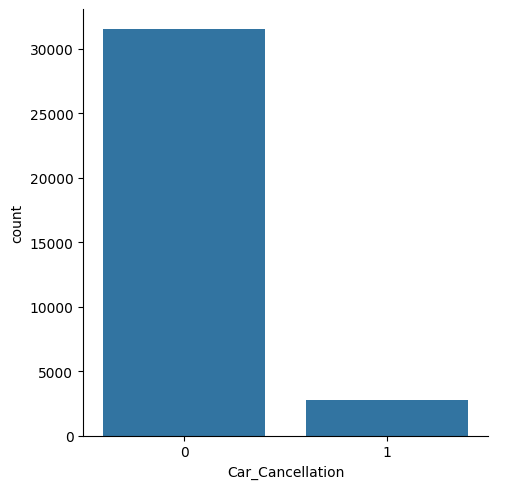

In [550]:
# 1. Imbalance data for model 2
# 2. how we can balance the imbalance data
pos = df_travel_type_2[df_travel_type_2["Car_Cancellation"]==1].shape[0]
neg = df_travel_type_2[df_travel_type_2["Car_Cancellation"]==0].shape[0]
print(pos, neg)
sns.catplot(data=df_travel_type_2, x="Car_Cancellation", kind="count")

### Extract Features and Target

In [551]:
x = df_travel_type_2.iloc[:,df_travel_type_2.columns !='Car_Cancellation']
y = df_travel_type_2.Car_Cancellation
x.head()

,vehicle_model_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Trip_dist_km,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,time_diff_day_bk_at,from_area_canc_perc_encoded,to_area_canc_perc_encoded,frm_dt_wkday_wkend_encoded,frm_dt_time_of_day_encoded
0,28,83.0,448.0,0,0,3.980687,1,1,2,1,0.35,1,1,0,2
1,12,1010.0,540.0,0,0,14.004432,1,1,9,1,6.58,1,1,0,3
2,12,1301.0,1034.0,0,0,12.648909,1,1,3,1,0.37,1,1,0,2
3,12,768.0,398.0,0,0,9.534596,1,1,5,1,1.10,1,0,0,3
4,12,1365.0,849.0,0,0,14.655467,1,1,9,1,1.12,1,1,0,3


In [552]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Car_Cancellation, dtype: int64

In [553]:
# pipeline with Robust scaler
pipeline_2 = Pipeline(steps=[("Robust", RobustScaler())])

X_2 = pipeline_2.fit_transform(x)

In [554]:
X_2

array([[ 3.20000000e+00, -7.28448276e-01, -1.40695915e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  6.03448276e-01, -1.51285930e-03, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [ 0.00000000e+00,  1.02155172e+00,  7.45839637e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -2.83045977e-01, -1.13464448e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.50000000e+01,  9.66954023e-01,  1.51285930e-03, ...,
         0.00000000e+00,  1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  1.42241379e-01, -2.23903177e-01, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01]])

In [555]:
# balance the data
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_2, y)
X_res

array([[ 3.20000000e+00, -7.28448276e-01, -1.40695915e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  6.03448276e-01, -1.51285930e-03, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [ 0.00000000e+00,  1.02155172e+00,  7.45839637e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.61192347e-02,  9.09263808e-01, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [ 1.54000000e+01,  7.29980627e-01,  1.08460532e+00, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [ 0.00000000e+00,  8.62222243e-01, -2.25416036e-01, ...,
         0.00000000e+00,  0.00000000e+00,  5.00000000e-01]])

In [556]:
models_2 = {
    "Random forest" : RandomForestClassifier(),
    "Decision tree" : DecisionTreeClassifier(),
    "logisitic Regression" : LogisticRegression(),
    "knn classifier" : KNeighborsClassifier(),
    "xgb" : XGBClassifier()
}

In [557]:
report_2 = evaluate_model(X_res, y_res, models_2)

Random forest
Model performance for test Set
- Accuracy: 0.9703638963928174
- f1 score: 0.9704975085027288
- precision score: 0.9691943127962085
- Recall: 0.9718042135276413
- roc: 0.9703593042769723
- total cost : 90950


Decision tree
Model performance for test Set
- Accuracy: 0.9266645479103766
- f1 score: 0.9276135205081955
- precision score: 0.9186082634358497
- Recall: 0.9367970853793759
- roc: 0.9266322426737467
- total cost : 204740


logisitic Regression
Model performance for test Set
- Accuracy: 0.7559192753853488
- f1 score: 0.7620449264136329
- precision score: 0.7456419584659694
- Recall: 0.7791858070647869
- roc: 0.7558450954660776
- total cost : 713780


knn classifier
Model performance for test Set
- Accuracy: 0.9035436198951216
- f1 score: 0.912041733082162
- precision score: 0.840432634530645
- Recall: 0.9969903373990179
- roc: 0.9032456867929252
- total cost : 21450


xgb
Model performance for test Set
- Accuracy: 0.965358334657556
- f1 score: 0.9651701549768333
- pr

In [558]:
report_2

,Model Name,Cost
3,knn classifier,21450
0,Random forest,90950
4,xgb,137640
1,Decision tree,204740
2,logisitic Regression,713780


In [559]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)

### Decision Tree with c4.5(entropy)¶


In [560]:
model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')

model_dt.fit(X_train,y_train)

model_dt_score_train = model_dt.score(X_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(X_test,y_test)
print(model_dt_score_test)

0.6861467561876763
0.687668838391864


#### Area Under the Curve

In [561]:
from sklearn.metrics import roc_curve, auc
y_pred_dt = model_dt.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,_ = roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

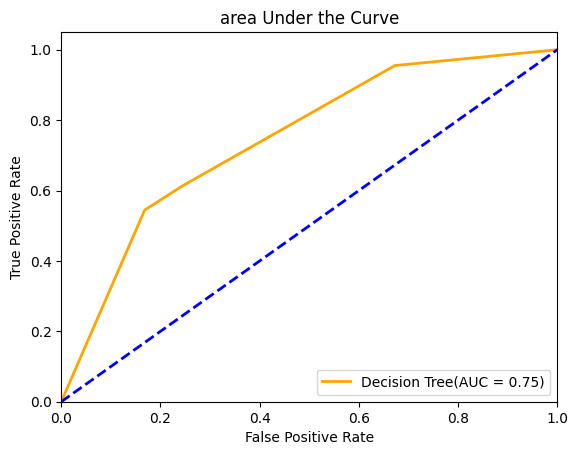

In [562]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")
plt.show()

#### K-Fold Cross-Validation

In [563]:
# The cross_val_score function simplifies K-fold cross-validation by handling data splitting, model training, and evaluation.
# K-fold validation is a powerful method to ensure your model's performance is robust and not dependent on a specific train-test split.
# K-Fold Cross-Validation is a popular technique in machine learning for assessing the generalization ability of a model. 


In [564]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier


In [565]:
# Initialize the model
model = RandomForestClassifier()

In [566]:
# Set Up K-fold Cross-Validation
#Now, define the K-fold cross-validator. You can choose the number of folds 𝐾.K depending on your data and needs.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [567]:
# Perform cross-validation
scores = cross_val_score(model,X_res, y_res, cv=kf)

In [568]:
# Print the scores for each fold
print("Cross-validation scores for each fold:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores for each fold: [0.97020499 0.97139679 0.97028444 0.96909019 0.96932857]
Average cross-validation score: 0.9700609950540677


In [569]:
# Model Quality: Given these high and consistent accuracy scores, the model seems to be of high quality and well-suited for the task. 
#                There's no immediate indication of overfitting, as the model performs consistently well across all folds.
# Generalization:The high average cross-validation score also suggests that the model should generalize well to new, unseen data, 
#                making it a reliable choice for deployment or further analysis.

### Conclusion for model 2 (Travel_type_id'=2 point to point- Intra city)

In [570]:
# Following are th features used in model 2
# vehicle_model_id,from_area_id, to_area_id, online_booking, mobile_site_booking, Trip_dist_km, frm_dt_month, frm_dt_day, frm_dt_hour	
# frm_dt_day_of_week, time_diff_day_bk_at,from_area_canc_perc_encoded,to_area_canc_perc_encoded,frm_dt_wkday_wkend_encoded,frm_dt_time_of_day_encoded

# Model Name	Cost			Cost 	Accuracy	F1-score	Precision	Recall	ROC 
# 3	knn classifier			21450	0.90		0.91		0.84		0.99	0.90
# 0	Random forest			88850	0.97		0.97		0.97		0.97	0.97
# 4	xgb						137640	0.96		0.96		0.97		0.95	0.96
# 1	Decision tree			205840	0.92		0.93		0.92		0.93	0.92
# 2	logisitic Regression	713780	0.76		0.76		0.74		0.78	0.75
								
# Decision Tree with c4.5(entropy) 		0.68			0.69
# Decision Tree AUC 	0.75

# Note: The cost is lowest for Knn classifier model so this model can be considered

## Analyze the data & required features for Travel Type=3 (hourly rental)- MODEL 3 creation

In [571]:
df_travel_type_3=df_original[df_original["travel_type_id"]==3]
df_travel_type_3.head(3)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
8,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.63575,NaN,NaN,0
20,132535,22190,87,2.0,3,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.63524,NaN,NaN,0
23,132538,21995,12,1.0,3,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.62032,NaN,NaN,0


#### Analyze the data & required features for Travel Type=3

In [572]:
# Package_id is applicable for only travel_type=3
# drop ID,user_id, travel_type_id, from_city_id	to_city_id,to_area_id'
# from_area_id- transform it by creating 3 new columns
    # from_area_id_canc_bucket- Create cancellation % for from_area and define the behavour as zero, low, med, high
# Do from_date transformation as done above
# Do booking_created transformation as done above
# Drop from_lat, from_long, to_lat, to_long
# Retain other columns online booking, mobile site booking, car cancleation

In [573]:
from_area_cancper_3= df_travel_type_3.groupby("from_area_id").apply(area_canc_perc).reset_index()

In [574]:
# Merge the cancellation percentage back to the original dataframe
df_travel_type_3 = pd.merge(df_travel_type_3, from_area_cancper_3, on='from_area_id', how='left')


In [575]:
df_travel_type_3.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc
0,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.92732,77.63575,NaN,NaN,0,L
1,132535,22190,87,2.0,3,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.01854,77.63524,NaN,NaN,0,L


In [576]:
# Convert he date into uniform format
df_travel_type_3['from_date']=df_travel_type_3['from_date'].apply(parser.parse)

# Extract month, day, and hour
df_travel_type_3['frm_dt_month'] = df_travel_type_3['from_date'].dt.month
df_travel_type_3['frm_dt_day'] = df_travel_type_3['from_date'].dt.day # To decide later if to drop
df_travel_type_3['frm_dt_hour'] = df_travel_type_3['from_date'].dt.hour

# Extract day of the week (0=Monday, 6=Sunday)
df_travel_type_3['frm_dt_day_of_week'] = df_travel_type_3['from_date'].dt.dayofweek

# Determine if it's a weekday or weekend
df_travel_type_3['frm_dt_wkday_wkend'] = df_travel_type_3['frm_dt_day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Apply the function to the DataFrame
df_travel_type_3['frm_dt_time_of_day'] = df_travel_type_3['from_date'].apply(lambda x: categorize_time_of_day(x))

# convert the date in proper format
df_travel_type_3['booking_created']=df_travel_type_3['booking_created'].apply(parser.parse)

# Calculate the time difference
df_travel_type_3['time_diff_bw_bk_at']=df_travel_type_3['from_date'] - df_travel_type_3['booking_created']

# Calculate the time difference in hours if requied
df_travel_type_3['time_diff_day_bk_at'] = round(df_travel_type_3['time_diff_bw_bk_at'] / pd.Timedelta(hours=1),2)
del df_travel_type_3['time_diff_bw_bk_at']
df_travel_type_3.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,area_canc_perc,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,frm_dt_wkday_wkend,frm_dt_time_of_day,time_diff_day_bk_at
0,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,12.92732,77.63575,NaN,NaN,0,L,1,1,16,1,Weekday,Afternoon,6.27
1,132535,22190,87,2.0,3,471.0,NaN,NaN,NaN,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,13.01854,77.63524,NaN,NaN,0,L,1,1,14,1,Weekday,Afternoon,1.63


In [577]:
# Drop all unnecessary columns to create final data set
df_travel_type_3=df_travel_type_3.drop(columns=['id','user_id','travel_type_id','to_area_id','from_city_id','to_city_id','from_date','booking_created','from_lat','from_long','to_lat','to_long'],axis=1)
df_travel_type_3.head(2)

,vehicle_model_id,package_id,from_area_id,online_booking,mobile_site_booking,Car_Cancellation,area_canc_perc,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,frm_dt_wkday_wkend,frm_dt_time_of_day,time_diff_day_bk_at
0,65,2.0,448.0,0,0,0,L,1,1,16,1,Weekday,Afternoon,6.27
1,87,2.0,471.0,0,0,0,L,1,1,14,1,Weekday,Afternoon,1.63


In [578]:
df_travel_type_3.isnull().sum()

vehicle_model_id       0
package_id             0
from_area_id           0
online_booking         0
mobile_site_booking    0
Car_Cancellation       0
area_canc_perc         0
frm_dt_month           0
frm_dt_day             0
frm_dt_hour            0
frm_dt_day_of_week     0
frm_dt_wkday_wkend     0
frm_dt_time_of_day     0
time_diff_day_bk_at    0
dtype: int64

#### Data encoding

In [579]:
# area_canc_perc  : Label encoding for ordinal this categorical column with below rank z=0,L=1, M=2, H=3
# if cancellation_percentage is 0% then denote it has 'Z' (Zero)
# if cancellation_percentage is b/w 1-35% then denote it has 'L' (low)
# if cancellation_percentage is b/w 36-65%  then denote it has 'M'(Medium)
# if cancellation_percentage is b/w 66-100%  then denote it has 'H' (High)

df_travel_type_3['area_canc_perc'].value_counts()

area_canc_perc
L    4844
Z    2675
M      28
H       3
Name: count, dtype: int64

In [580]:
df_travel_type_3['from_area_canc_perc_encoded'] = df_travel_type_3['area_canc_perc'].map({'Z':0,'L':1,'M':2,'H':3})
del df_travel_type_3['area_canc_perc']

In [581]:
# Encode column frm_dt_wkday_wkend
df_travel_type_3['frm_dt_wkday_wkend'].value_counts()

frm_dt_wkday_wkend
Weekday    4693
Weekend    2857
Name: count, dtype: int64

In [582]:
le.fit_transform(df_travel_type_3['frm_dt_wkday_wkend'])

df_travel_type_3['frm_dt_wkday_wkend_encoded'] =le.fit_transform(df_travel_type_3['frm_dt_wkday_wkend'])
del df_travel_type_3['frm_dt_wkday_wkend']

In [583]:
# Encode frm_dt_time_of_day
df_travel_type_3['frm_dt_time_of_day_encoded'] =le.fit_transform(df_travel_type_3['frm_dt_time_of_day'])
del df_travel_type_3['frm_dt_time_of_day']
# Datset ready for model 3
df_travel_type_3.head()

,vehicle_model_id,package_id,from_area_id,online_booking,mobile_site_booking,Car_Cancellation,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,time_diff_day_bk_at,from_area_canc_perc_encoded,frm_dt_wkday_wkend_encoded,frm_dt_time_of_day_encoded
0,65,2.0,448.0,0,0,0,1,1,16,1,6.27,1,0,0
1,87,2.0,471.0,0,0,0,1,1,14,1,1.63,1,0,0
2,12,1.0,1286.0,0,0,0,1,1,16,1,1.85,1,0,0
3,12,1.0,1323.0,1,0,0,1,1,20,1,2.58,1,0,1
4,12,2.0,142.0,0,0,0,1,2,3,2,7.38,1,0,2


336 7214


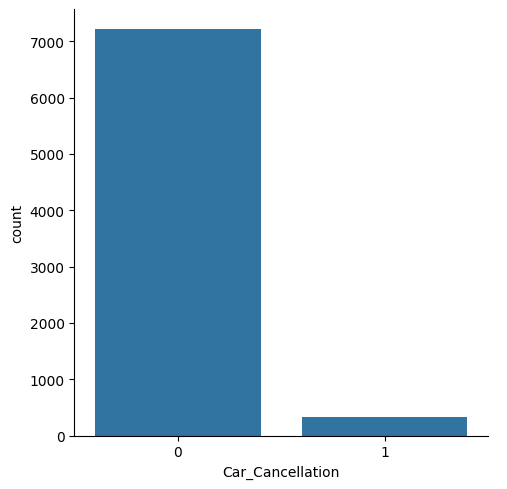

In [584]:
# 1. Imbalance data for model 2
# 2. how we can balance the imbalance data
pos = df_travel_type_3[df_travel_type_3["Car_Cancellation"]==1].shape[0]
neg = df_travel_type_3[df_travel_type_3["Car_Cancellation"]==0].shape[0]
print(pos, neg)
sns.catplot(data=df_travel_type_3, x="Car_Cancellation", kind="count")

### Extract Features and Target

In [585]:
x = df_travel_type_3.iloc[:,df_travel_type_3.columns !='Car_Cancellation']
y = df_travel_type_3.Car_Cancellation
x.head()

,vehicle_model_id,package_id,from_area_id,online_booking,mobile_site_booking,frm_dt_month,frm_dt_day,frm_dt_hour,frm_dt_day_of_week,time_diff_day_bk_at,from_area_canc_perc_encoded,frm_dt_wkday_wkend_encoded,frm_dt_time_of_day_encoded
0,65,2.0,448.0,0,0,1,1,16,1,6.27,1,0,0
1,87,2.0,471.0,0,0,1,1,14,1,1.63,1,0,0
2,12,1.0,1286.0,0,0,1,1,16,1,1.85,1,0,0
3,12,1.0,1323.0,1,0,1,1,20,1,2.58,1,0,1
4,12,2.0,142.0,0,0,1,2,3,2,7.38,1,0,2


In [586]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Car_Cancellation, dtype: int64

In [587]:
# pipeline with Robust scaler
pipeline_3 = Pipeline(steps=[("Robust", RobustScaler())])

In [588]:
X_3 = pipeline_3.fit_transform(x)

In [589]:
# balance the data
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=101, sampling_strategy="minority")
X_res, y_res = smt.fit_resample(X_3, y)
X_res

array([[ 4.41666667,  0.        , -0.33469945, ...,  0.        ,
         0.        , -1.        ],
       [ 6.25      ,  0.        , -0.30327869, ...,  0.        ,
         0.        , -1.        ],
       [ 0.        , -1.        ,  0.81010929, ...,  0.        ,
         0.        , -1.        ],
       ...,
       [ 0.        , -1.        , -0.03032846, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  1.        , -0.73360656, ...,  0.        ,
         0.        , -0.45354705],
       [ 6.39496119,  0.        ,  0.35992477, ...,  0.        ,
         1.        ,  0.        ]])

In [590]:
models_3 = {
    "Random forest" : RandomForestClassifier(),
    "Decision tree" : DecisionTreeClassifier(),
    "logisitic Regression" : LogisticRegression(),
    "knn classifier" : KNeighborsClassifier(),
    "xgb" : XGBClassifier()
}

In [591]:
report_3 = evaluate_model(X_res, y_res, models_3)

Random forest
Model performance for test Set
- Accuracy: 0.9795209996528983
- f1 score: 0.9799387963277797
- precision score: 0.978275627970129
- Recall: 0.9816076294277929
- roc: 0.9794803893777322
- total cost : 13820


Decision tree
Model performance for test Set
- Accuracy: 0.9611246095105866
- f1 score: 0.9617224880382775
- precision score: 0.9650205761316872
- Recall: 0.9584468664850136
- roc: 0.9611767241129952
- total cost : 31010


logisitic Regression
Model performance for test Set
- Accuracy: 0.7782020131898646
- f1 score: 0.790834697217676
- precision score: 0.7611846250787649
- Recall: 0.8228882833787466
- roc: 0.7773323228641786
- total cost : 133790


knn classifier
Model performance for test Set
- Accuracy: 0.9267615411315515
- f1 score: 0.93282394141993
- precision score: 0.8756724447101016
- Recall: 0.9979564032697548
- roc: 0.9253759369498101
- total cost : 3580


xgb
Model performance for test Set
- Accuracy: 0.9802152030544949
- f1 score: 0.9805659734060689
- preci

In [592]:
report_3

,Model Name,Cost
3,knn classifier,3580
0,Random forest,13820
4,xgb,15270
1,Decision tree,31010
2,logisitic Regression,133790


### Decision Tree with c4.5(entropy)¶

In [593]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)

In [594]:
model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')

model_dt.fit(X_train,y_train)

model_dt_score_train = model_dt.score(X_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(X_test,y_test)
print(model_dt_score_test)

0.751236871799323
0.7532106907323846


#### Area Under the Curve


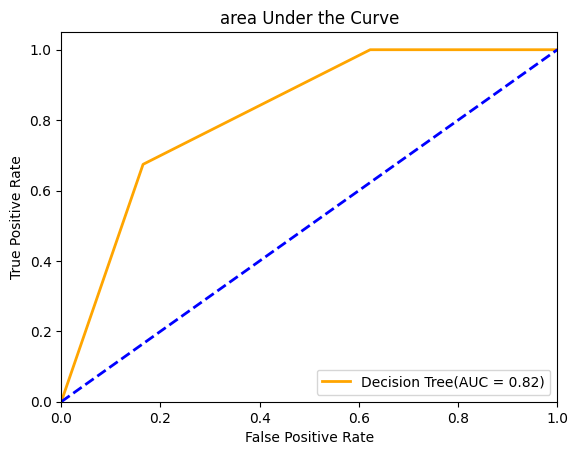

In [595]:
from sklearn.metrics import roc_curve, auc
y_pred_dt = model_dt.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,_ = roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")
plt.show()

### Conclusion for model 3 (Travel_type_id'=3 hourly rental)

In [596]:
# Following are features used in model 3
# vehicle_model_id,package_id, from_area_id, online_booking, mobile_site_booking, frm_dt_month, frm_dt_day, frm_dt_hour, frm_dt_day_of_week	
# time_diff_day_bk_at, from_area_canc_perc_encoded, frm_dt_wkday_wkend_encoded, frm_dt_time_of_day_encoded

# Model Name					Cost	Accuracy	F1-score	Precision	Recall	ROC
# 3	knn classifier			3580	0.92		0.93		0.87		0.99	0.92	
# 0	Random forest			13820	0.98		0.98		0.98		0.98	0.98
# 4	xgb						15270	0.98		0.98		0.98		0.98	0.98
# 1	Decision tree			31060	0.96		0.96		0.96		0.96	0.96
# 2	logisitic Regression	133790	0.78		0.79		0.76		0.82	0.77

# Decision Tree with c4.5(entropy) 		0.75	0.75
# Decision Tree AUC 	0.82

# Note: The cost is lowest for Knn classifier model so this model can be considered

#### K-Fold Cross-Validation

In [597]:
# The cross_val_score function simplifies K-fold cross-validation by handling data splitting, model training, and evaluation.
# K-fold validation is a powerful method to ensure your model's performance is robust and not dependent on a specific train-test split.
# K-Fold Cross-Validation is a popular technique in machine learning for assessing the generalization ability of a model. 

In [598]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [599]:
# Initialize the model
model = RandomForestClassifier()

In [600]:
# Set Up K-fold Cross-Validation
#Now, define the K-fold cross-validator. You can choose the number of folds 𝐾.K depending on your data and needs.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [601]:
# Perform cross-validation
scores = cross_val_score(model,X_res, y_res, cv=kf)

# Print the scores for each fold
print("Cross-validation scores for each fold:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores for each fold: [0.98542173 0.9798681  0.98159722 0.98506944 0.98541667]
Average cross-validation score: 0.9834746326507


In [602]:
# Model Quality: Given these high and consistent accuracy scores, the model seems to be of high quality and well-suited for the task. 
#                There's no immediate indication of overfitting, as the model performs consistently well across all folds.
# Generalization:The high average cross-validation score also suggests that the model should generalize well to new, unseen data, 
#                making it a reliable choice for deployment or further analysis.